<a href="https://colab.research.google.com/github/carolinehagood/DS-4002/blob/main/HW4_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Load ./data/Q1_clean.csv.

1. Compute the average prices and scores by Neighbourhood ; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by Neighbourhood .

In [4]:
import pandas as pd
url = "https://raw.githubusercontent.com/DS3001/linearRegression/refs/heads/main/data/Q1_clean.csv"
df = pd.read_csv(url)
df.head(3)

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt


In [7]:
df = df.rename(columns={'Neighbourhood ': 'Neighbourhood'})

neighbourhood_summary = df.groupby('Neighbourhood').agg(
    avg_price=('Price', 'mean'),
    avg_rating=('Review Scores Rating', 'mean')
).reset_index()

most_expensive = neighbourhood_summary.sort_values(by='avg_price', ascending=False).iloc[0]

print("Average prices and ratings by neighbourhood:\n", neighbourhood_summary)
print("Most expensive neighbourhood:", most_expensive['Neighbourhood'])
print("Average Price:", most_expensive['avg_price'])

Average prices and ratings by neighbourhood:
    Neighbourhood   avg_price  avg_rating
0          Bronx   75.276498   91.654378
1       Brooklyn  127.747378   92.363497
2      Manhattan  183.664286   91.801496
3         Queens   96.857233   91.549057
4  Staten Island  146.166667   90.843750
Most expensive neighbourhood: Manhattan
Average Price: 183.6642863215166


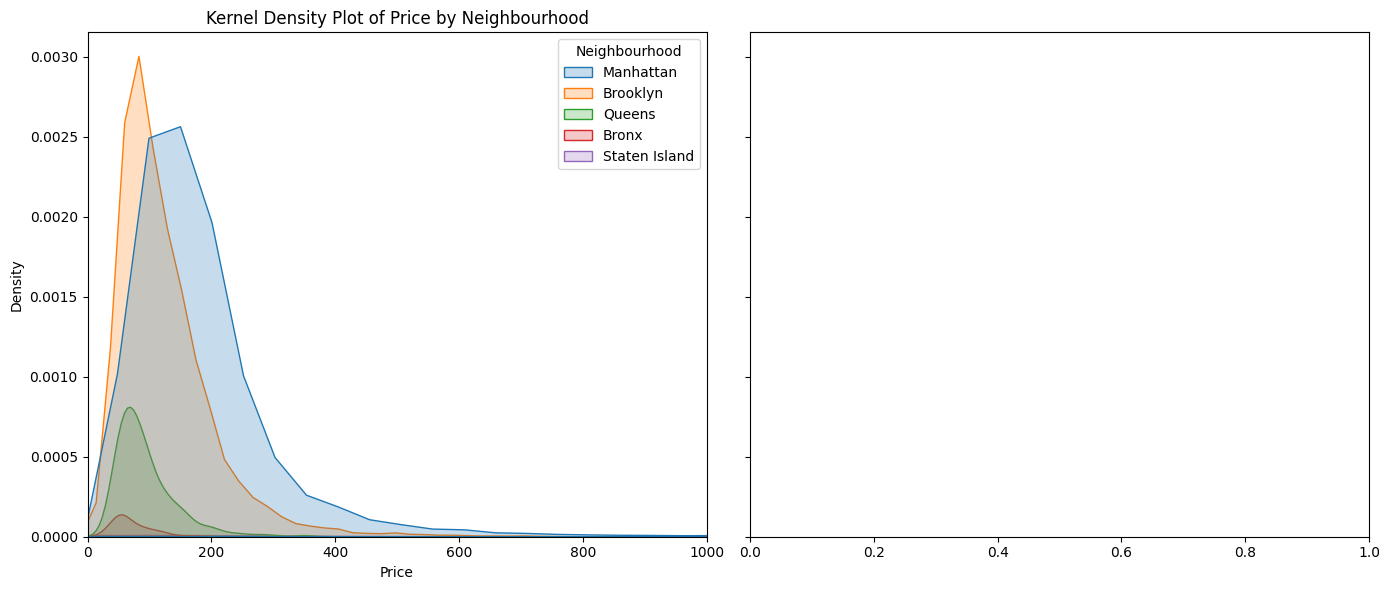

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df['Log Price'] = np.log(df['Price'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Kernel Density Plot for Price
sns.kdeplot(data=df, x='Price', hue='Neighbourhood', fill=True, ax=axes[0])
axes[0].set_title('Kernel Density Plot of Price by Neighbourhood')
axes[0].set_xlim(0, 1000)

# Show plot
plt.tight_layout()
plt.show()

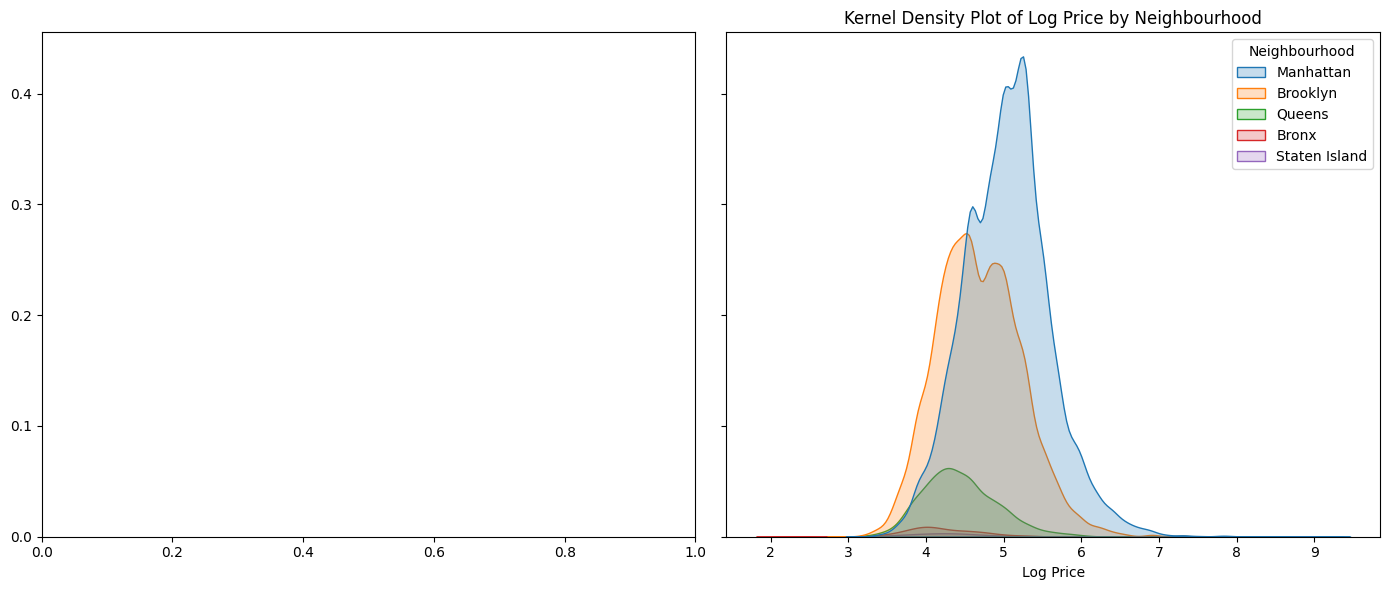

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Kernel Density Plot for Log Price
sns.kdeplot(data=df, x='Log Price', hue='Neighbourhood', fill=True, ax=axes[1])
axes[1].set_title('Kernel Density Plot of Log Price by Neighbourhood')

plt.tight_layout()
plt.show()

2. Regress price on Neighbourhood  by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [23]:
import statsmodels.api as sm

X = pd.get_dummies(df['Neighbourhood'], drop_first=False)
model = sm.OLS(df['Price'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     268.9
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          4.43e-226
Time:                        23:58:21   Log-Likelihood:            -1.4174e+05
No. Observations:               22153   AIC:                         2.835e+05
Df Residuals:                   22148   BIC:                         2.835e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Bronx            75.2765      9.868      7.628

The coefficients of the regression just produced are almost identical to the average price produced earlier for each neighborhood. The coefficients of regression for these categorical variables of the variable price is equivalent to the average of that variable.

3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [31]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood'], dtype='int', drop_first = True)

from sklearn import linear_model
reg = linear_model.LinearRegression().fit(X,y)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


In [32]:
print(reg.intercept_)

75.27649769585331


In [33]:
results = pd.DataFrame({'variable':reg.feature_names_in_,
                        'coefficient': reg.coef_+reg.intercept_}) # Regression coefficients
results

,variable,coefficient
0,Brooklyn,127.747378
1,Manhattan,183.664286
2,Queens,96.857233
3,Staten Island,146.166667


The coefficient of the previous regression of the Bronx is the intercept used, so the new coefficints are relative to the Bronx.

4. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood . What is the
 and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [34]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100)

Z_train = pd.concat([X_train['Review Scores Rating'],
                     pd.get_dummies(X_train['Neighbourhood'], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood'], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

Rsq:  0.06701086106947296
RMSE:  125.01092061382933


,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


The R^2 is 0.06 and the RMSE is 125.01. The most expensive property was one in Manhattan for 192.64 per night. The coefficient on the review scores rating is 192.84.

5. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood  and Property Type. What is the
 and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [37]:
y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood', 'Room Type'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100)

Z_train = pd.concat([X_train['Review Scores Rating'],
                    pd.get_dummies(X_train['Neighbourhood'], dtype='int'),
                    pd.get_dummies(X_train['Room Type'], dtype='int')],
                    axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood'], dtype='int'),
                    pd.get_dummies(X_test['Room Type'], dtype='int')],
                    axis = 1)
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

Rsq:  0.22035348129282306
RMSE:  114.27692123130633


,variable,coefficient
0,Review Scores Rating,0.626912
1,Bronx,-13.022765
2,Brooklyn,10.378456
3,Manhattan,53.693304
4,Queens,-6.833330
5,Staten Island,50.003022
6,Entire home/apt,110.617820
7,Private room,3.101341
8,Shared room,-19.500474


The R^2 is 0.22 and the RSME is 114.27. The coeffient  is
 0.63. The most expensive property you can rent is a 100 rated entire home in Manhattan.

6. What does the coefficient on Review Scores Rating mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.

Between part 4 and 5, the coefficient changed from 1.03 to 0.63 which shows how the rating becomes less powerful as we look at more variables. In part 5, we included information on room type which made the review rating less important as a predictor.

Q2. This question is a case study for linear models. The data are about car prices.

1. Load cars_hw.csv. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.

In [38]:
import pandas as pd
url = "https://raw.githubusercontent.com/DS3001/linearRegression/refs/heads/main/data/cars_hw.csv"
df = pd.read_csv(url)
df.head(3)

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000


In [41]:
df = df.dropna()


2. Summarize the Price variable and create a kernel density plot. Use .groupby() and .describe() to summarize prices by brand (Make). Make a grouped kernel density plot by Make. Which car brands are the most expensive? What do prices look like in general?

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,4.535000e+05,2.466064e+05,267000.0,288500.0,345500.0,537500.0,892000.0
Datsun,3.0,2.896667e+05,1.050397e+04,279000.0,284500.0,290000.0,295000.0,300000.0
Ford,52.0,7.211731e+05,1.409277e+05,290000.0,635000.0,707500.0,787000.0,1066000.0
Honda,73.0,7.989726e+05,2.665091e+05,316000.0,581000.0,785000.0,915000.0,1537000.0
Hyundai,305.0,6.918918e+05,2.791597e+05,248000.0,485000.0,638000.0,837000.0,1742000.0
Jeep,4.0,1.499500e+06,1.525134e+05,1290000.0,1447500.0,1529500.0,1581500.0,1649000.0
Kia,8.0,1.614750e+06,1.190567e+05,1369000.0,1579000.0,1628500.0,1705750.0,1741000.0
MG Motors,35.0,1.869457e+06,1.216611e+05,1589000.0,1786500.0,1848000.0,1978000.0,2019000.0
Mahindra,18.0,1.100167e+06,1.755493e+05,796000.0,1037000.0,1094500.0,1157000.0,1465000.0


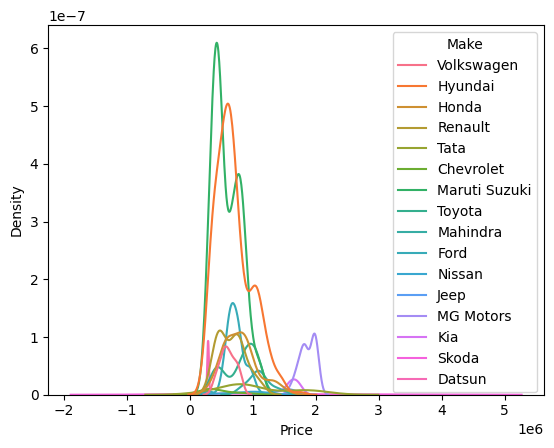

In [43]:
df0 = df
sns.kdeplot(data = df0, x='Price',hue='Make')
df0['Price'].groupby(df0['Make']).describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,13.613042,0.480975,13.188151,13.261539,13.445433,13.864828,14.394369
Datsun,3.0,13.269194,0.036311,13.232114,13.251449,13.270783,13.287734,13.304685
Ford,52.0,14.161427,0.210895,13.270783,14.054527,14.162640,14.269131,14.572571
Honda,73.0,14.229465,0.336972,13.356645,13.965653,14.266586,14.419827,14.938490
Hyundai,305.0,14.061658,0.398781,13.114331,13.785051,14.059241,14.330727,15.063692
Jeep,4.0,14.909738,0.105084,14.763300,14.876417,14.933413,14.966733,15.008827
Kia,8.0,14.985324,0.076877,14.822738,14.965389,14.996253,15.042662,15.063117
MG Motors,35.0,15.132199,0.066263,14.971763,15.088892,15.122762,15.190744,15.211260
Mahindra,18.0,14.592100,0.159906,14.280502,14.544955,14.598828,14.654396,14.890513


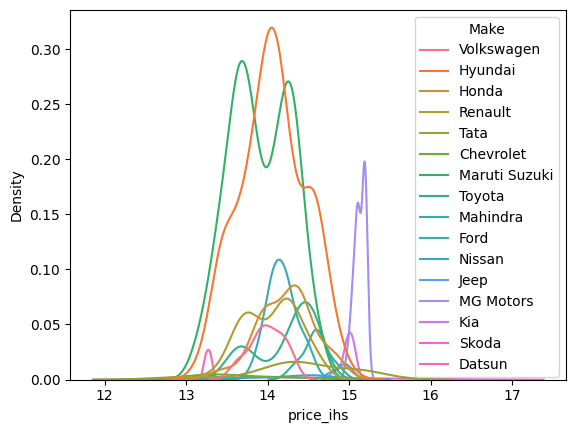

In [45]:
df['price_ihs'] = np.arcsinh(df['Price'])
df['mileage_ihs'] = np.arcsinh(df['Mileage_Run'])
df['age'] = max(df['Make_Year'])-df['Make_Year']
df = df.drop(['Price','Mileage_Run','Make_Year','Unnamed: 0'],axis=1)
sns.kdeplot(data=df,x='price_ihs',hue='Make')
df['price_ihs'].groupby(df['Make']).describe()

<Axes: xlabel='price_ihs', ylabel='Density'>

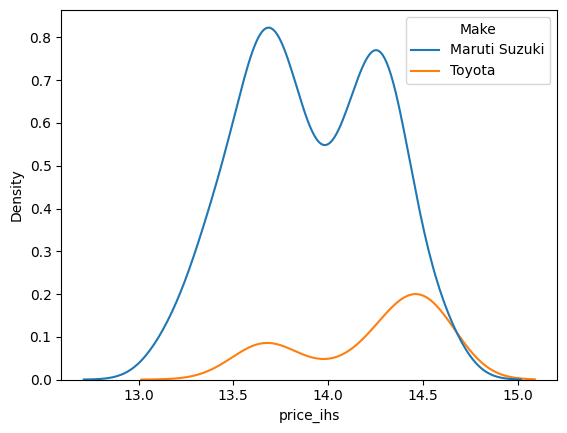

In [46]:
sns.kdeplot(data=df.loc[ df['Make'].isin(['Maruti Suzuki','Toyota'])  ,:],x='price_ihs',hue='Make')

The most expensive cars are Mg Motors. Kia and then Jeep are second and third most expensive. Maruti Suzuki and Toyota are the only plots that have only one peak, as the others flucuate in price a lot.

3. Split the data into an 80% training set and a 20% testing set.

In [47]:
N = df.shape[0]
df = df.sample(frac=1, random_state=100)
train_size = int(.8*N)

df_train = df[0:train_size]
y_train = df_train['price_ihs']

df_test = df[train_size:]
y_test = df_test['price_ihs']

4. Make a model where you regress price on the numeric variables alone; what is the
 and RMSE on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use pd.get_dummies(); be careful of the dummy variable trap); what is the
 and RMSE on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the
 and RMSE on the test set? Does the joint model perform better or worse, and by home much?

In [48]:
from sklearn import linear_model

var_n = ['age','mileage_ihs','Seating_Capacity']
X_train_n = df_train.loc[:,var_n]
reg_n = linear_model.LinearRegression().fit(X_train_n,y_train)
X_test_n = df_test.loc[:,var_n]
y_hat = reg_n.predict(X_test_n)
print('Numeric only Rsq: ', reg_n.score(X_test_n,y_test))
rmse_n = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('Numeric only RMSE: ', rmse_n)

Numeric only Rsq:  0.45254262356326824
Numeric only RMSE:  0.33392654735906463


In [49]:
var_cat = ['Make','Body_Type','Color','Fuel_Type','Transmission','Transmission_Type']

dummies = pd.DataFrame([])
for var in var_cat:
    new_dummies = pd.get_dummies( df.loc[:,var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True)
    X_train_c = dummies.iloc[0:train_size,:]
    X_test_c = dummies.iloc[train_size:,:]

reg_c = linear_model.LinearRegression().fit(X_train_c,y_train)
y_hat_c = reg_c.predict(X_test_c)
print('Categorical only Rsq: ', reg_c.score(X_test_c,y_test))
rmse_c = np.sqrt( np.mean( (y_test - y_hat_c)**2 ))
print('Categorical only RMSE: ', rmse_c)

Categorical only Rsq:  0.6298129532407464
Categorical only RMSE:  0.27459106425227275


In [50]:
X_train_all = pd.concat([X_train_n, X_train_c],axis=1, ignore_index=True)
X_test_all = pd.concat([X_test_n, X_test_c],axis=1, ignore_index=True)

reg_all = linear_model.LinearRegression().fit(X_train_all,y_train)
y_hat_all = reg_all.predict(X_test_all)
print('All Rsq: ', reg_all.score(X_test_all,y_test))
rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
print('All RMSE: ', rmse_all)

All Rsq:  0.7999206763763922
All RMSE:  0.20187237686198914


The model that performs the best is the joint model with numeric and categorical variables. It has an R^2 of 0.716 and a RSME of 0.21. The individual numeric and categorical models acheived worse results for both values, so expanding the set of features made the joint model perform better.

5. Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the
 and RMSE change? At what point does
 go negative on the test set? For your best model with expanded features, what is the
 and RMSE? How does it compare to your best model from part 4?

In [51]:
from sklearn.preprocessing import PolynomialFeatures

for d in np.arange(1,5):
    expander = PolynomialFeatures(degree=d,include_bias=False)

    Z = expander.fit_transform(X_test_n)
    names = expander.get_feature_names_out()
    X_test_d = pd.DataFrame(data=Z, columns = names)
    Z = expander.fit_transform(X_train_n)
    names = expander.get_feature_names_out()
    X_train_d = pd.DataFrame(data=Z, columns = names)
    X_train_d.reset_index(drop=True, inplace=True)
    X_train_c.reset_index(drop=True, inplace=True)
    X_train_all = pd.concat([X_train_d, X_train_c], axis=1, ignore_index=True)

    X_test_d.reset_index(drop=True, inplace=True)
    X_test_c.reset_index(drop=True, inplace=True)
    X_test_all = pd.concat([X_test_d, X_test_c], axis=1, ignore_index=True)

    reg_all = linear_model.LinearRegression().fit(X_train_all,y_train)
    print(d, ' Rsq: ', reg_all.score(X_test_all,y_test))
    y_hat_all = reg_all.predict(X_test_all)
    rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
    print(d, 'RMSE: ', rmse_all)

1  Rsq:  0.7999206763763922
1 RMSE:  0.20187237686198914
2  Rsq:  0.8025408094604635
2 RMSE:  0.2005462138908579
3  Rsq:  0.7996599800454635
3 RMSE:  0.20200385035775245
4  Rsq:  -5077888181.655391
4 RMSE:  32160.097581097867


As you increase the degree of expansion, the performance improves and peaks at best results with degree of 2. The degree of 2 produces an R^2 of 0.74 and an RSME of 0.196.

6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

<Axes: xlabel='price_ihs'>

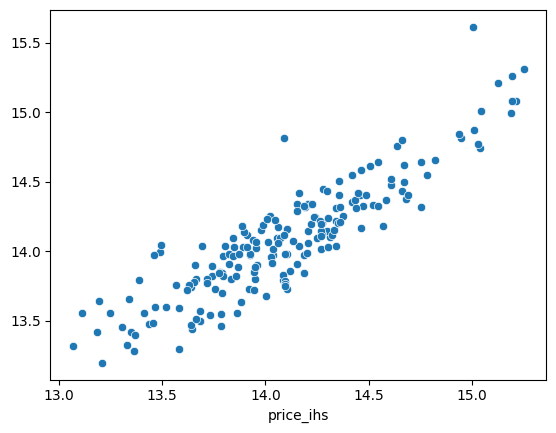

In [52]:
d = 2

expander = PolynomialFeatures(degree=d,include_bias=False)
Z = expander.fit_transform(X_test_n)
names = expander.get_feature_names_out()
X_test_d = pd.DataFrame(data=Z, columns = names)

Z = expander.fit_transform(X_train_n)
names = expander.get_feature_names_out()
X_train_d = pd.DataFrame(data=Z, columns = names)

X_train_d.reset_index(drop=True, inplace=True)
X_train_c.reset_index(drop=True, inplace=True)
X_train_all = pd.concat([X_train_d, X_train_c], axis=1)
X_train_all.columns = X_train_all.columns.astype(str)

X_test_d.reset_index(drop=True, inplace=True)
X_test_c.reset_index(drop=True, inplace=True)
X_test_all = pd.concat([X_test_d, X_test_c], axis=1)
X_test_all.columns = X_test_all.columns.astype(str)

reg_all = linear_model.LinearRegression().fit(X_train_all,y_train)

y_hat_all = reg_all.predict(X_test_all)
residuals = y_test - y_hat_all


sns.scatterplot(x=y_test,y=y_hat_all)

<Axes: xlabel='price_ihs', ylabel='Density'>

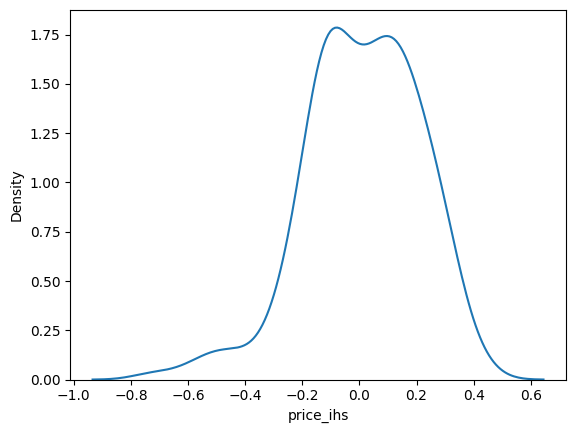

In [53]:
sns.kdeplot(residuals)

In [54]:
from sklearn import tree

X_train_n.reset_index(drop=True, inplace=True)
X_train_c.reset_index(drop=True, inplace=True)
X_train_all = pd.concat([X_train_n, X_train_c],axis=1)
X_train_all.columns = X_train_all.columns.astype(str)
X_test_n.reset_index(drop=True, inplace=True)
X_test_c.reset_index(drop=True, inplace=True)
X_test_all = pd.concat([X_test_n, X_test_c],axis=1)
X_test_all.columns = X_test_all.columns.astype(str)

sup_depth = 20
for d in np.arange(2,sup_depth):
    model = tree.DecisionTreeRegressor(max_depth=d)
    cart = model.fit(X_train_all, y_train)
    cart.score(X_test_all,y_test)
    y_hat = cart.predict(X_test_all)
    rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
    print('Depth: ', d, ', RMSE: ', rmse, ', Rsq: ', cart.score(X_test_all,y_test))

Depth:  2 , RMSE:  0.30146124904222643 , Rsq:  0.5538186573009409
Depth:  3 , RMSE:  0.2708659626214604 , Rsq:  0.6397887383319393
Depth:  4 , RMSE:  0.24859265755663473 , Rsq:  0.696593408254073
Depth:  5 , RMSE:  0.2355172171928908 , Rsq:  0.7276710948880617
Depth:  6 , RMSE:  0.24247183753767718 , Rsq:  0.7113503567644203
Depth:  7 , RMSE:  0.25647867170619043 , Rsq:  0.6770383692834803
Depth:  8 , RMSE:  0.22076543149647365 , Rsq:  0.7607177087726118
Depth:  9 , RMSE:  0.21335223935054162 , Rsq:  0.7765178561835978
Depth:  10 , RMSE:  0.25236118746702124 , Rsq:  0.6873247237704931
Depth:  11 , RMSE:  0.23111179866720818 , Rsq:  0.7377637941362654
Depth:  12 , RMSE:  0.2350499093481404 , Rsq:  0.7287507202387831
Depth:  13 , RMSE:  0.26786109432801397 , Rsq:  0.647736459950147
Depth:  14 , RMSE:  0.2368048554157133 , Rsq:  0.7246851587211628
Depth:  15 , RMSE:  0.2344050120757928 , Rsq:  0.7302371105094345
Depth:  16 , RMSE:  0.23965801831286157 , Rsq:  0.718010884423526
Depth:  17 

For the scatterplot, the values line up well along the diagonal. The kernel density plot produces an image that resembles the bell shape and is pretty symetrical. It is not perfectly even, however.